<a href="https://colab.research.google.com/github/Antonypraveenraj001/tensorflow_AI/blob/main/tf_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-03-04 11:53:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2024-03-04 11:53:04 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


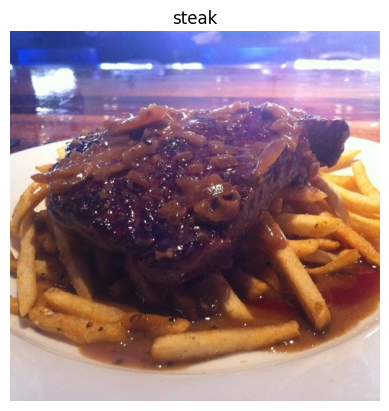

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 46,  72, 169],
        [ 40,  66, 163],
        [ 42,  68, 165],
        ...,
        [182, 178, 254],
        [183, 179, 255],
        [184, 180, 255]],

       [[ 47,  73, 170],
        [ 40,  66, 163],
        [ 42,  68, 165],
        ...,
        [181, 177, 253],
        [182, 178, 254],
        [183, 179, 255]],

       [[ 46,  72, 167],
        [ 40,  66, 161],
        [ 42,  68, 163],
        ...,
        [178, 175, 252],
        [179, 177, 252],
        [181, 179, 254]],

       ...,

       [[206, 198, 211],
        [206, 198, 211],
        [206, 198, 211],
        ...,
        [213, 204, 205],
        [213, 204, 205],
        [214, 205, 206]],

       [[205, 197, 210],
        [206, 198, 211],
        [206, 198, 211],
        ...,
        [212, 203, 204],
        [215, 206, 207],
        [216, 207, 208]],

       [[205, 197, 210],
        [206, 198, 211],
        [207, 199, 212],
        ...,
        [213, 204, 20

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img/255.

array([[[0.18039216, 0.28235294, 0.6627451 ],
        [0.15686275, 0.25882353, 0.63921569],
        [0.16470588, 0.26666667, 0.64705882],
        ...,
        [0.71372549, 0.69803922, 0.99607843],
        [0.71764706, 0.70196078, 1.        ],
        [0.72156863, 0.70588235, 1.        ]],

       [[0.18431373, 0.28627451, 0.66666667],
        [0.15686275, 0.25882353, 0.63921569],
        [0.16470588, 0.26666667, 0.64705882],
        ...,
        [0.70980392, 0.69411765, 0.99215686],
        [0.71372549, 0.69803922, 0.99607843],
        [0.71764706, 0.70196078, 1.        ]],

       [[0.18039216, 0.28235294, 0.65490196],
        [0.15686275, 0.25882353, 0.63137255],
        [0.16470588, 0.26666667, 0.63921569],
        ...,
        [0.69803922, 0.68627451, 0.98823529],
        [0.70196078, 0.69411765, 0.98823529],
        [0.70980392, 0.70196078, 0.99607843]],

       ...,

       [[0.80784314, 0.77647059, 0.82745098],
        [0.80784314, 0.77647059, 0.82745098],
        [0.80784314, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 146ms/step - loss: 0.5888 - accuracy: 0.6800 - val_loss: 0.4043 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4139 - accuracy: 0.8207 - val_loss: 0.3365 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3897 - accuracy: 0.8247 - val_loss: 0.4343 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3371 - accuracy: 0.8653 - val_loss: 0.3586 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3267 - accuracy: 0.8733 - val_loss: 0.3444 - val_accuracy: 0.8400


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 2.3834 - accuracy: 0.6493 - val_loss: 0.9505 - val_accuracy: 0.6260
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.9370 - accuracy: 0.6833 - val_loss: 0.6231 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6019 - accuracy: 0.7647 - val_loss: 0.6180 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.5652 - accuracy: 0.7713 - val_loss: 0.6848 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6566 - accuracy: 0.7527 - val_loss: 0.6055 - val_accuracy: 0.7560


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (288, 512, 3)
Image shape: (512, 512, 3)


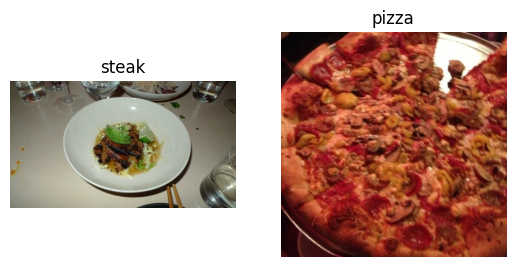

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [ ]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 142ms/step - loss: 0.9021 - accuracy: 0.6607 - val_loss: 0.4906 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4411 - accuracy: 0.8047 - val_loss: 0.4643 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3059 - accuracy: 0.8860 - val_loss: 0.3662 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.1559 - accuracy: 0.9553 - val_loss: 0.3592 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.0576 - accuracy: 0.9893 - val_loss: 0.4061 - val_accuracy: 0.8400


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

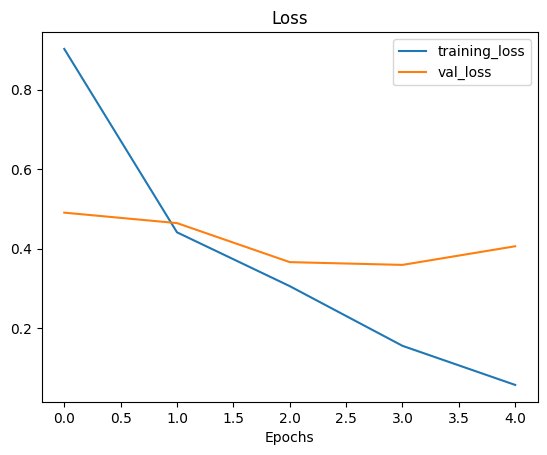

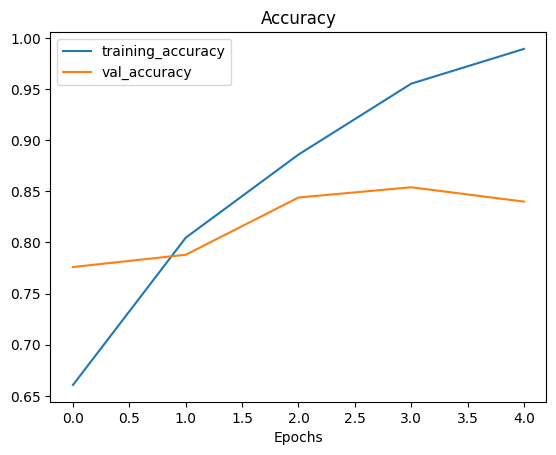

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 122ms/step - loss: 0.6259 - accuracy: 0.6420 - val_loss: 0.4843 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4886 - accuracy: 0.7860 - val_loss: 0.4022 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4402 - accuracy: 0.8060 - val_loss: 0.3940 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4442 - accuracy: 0.8033 - val_loss: 0.3940 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4125 - accuracy: 0.8307 - val_loss: 0.3839 - val_accuracy: 0.8040


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

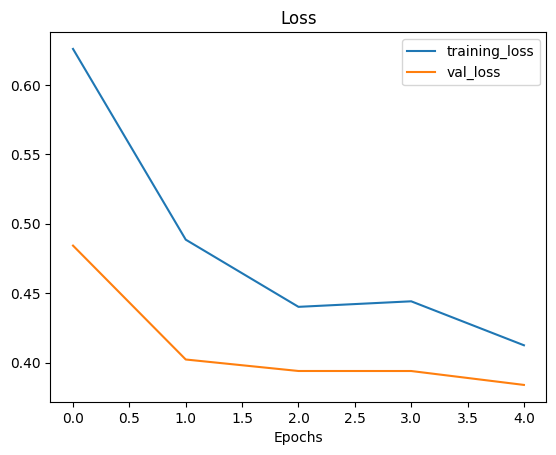

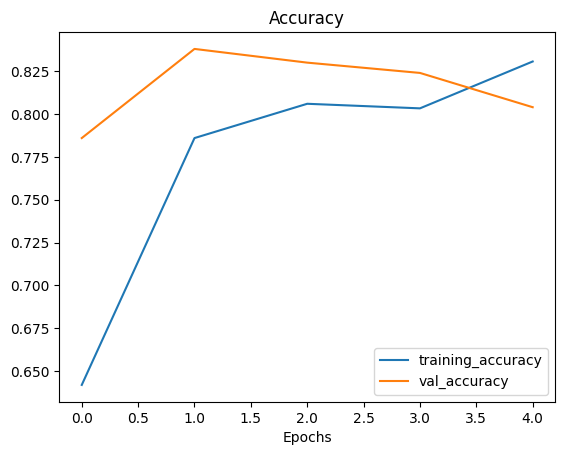

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

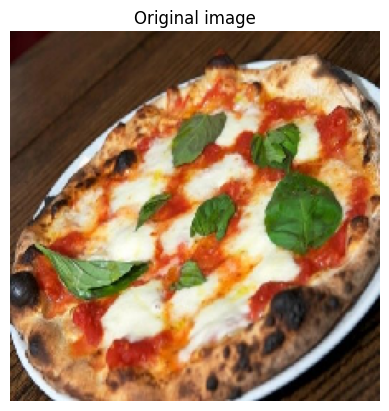

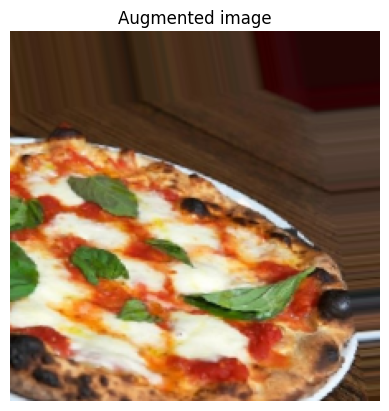

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 441ms/step - loss: 0.7662 - accuracy: 0.5487 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6925 - accuracy: 0.5013 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 434ms/step - loss: 0.6925 - accuracy: 0.5020 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6912 - accuracy: 0.4973 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6906 - accuracy: 0.5020 - val_loss: 0.6858 - val_accuracy: 0.5000


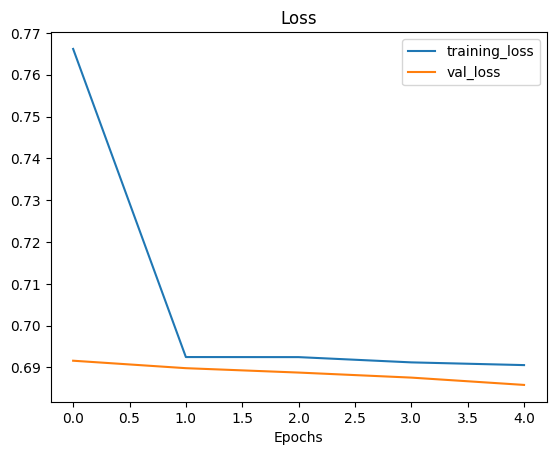

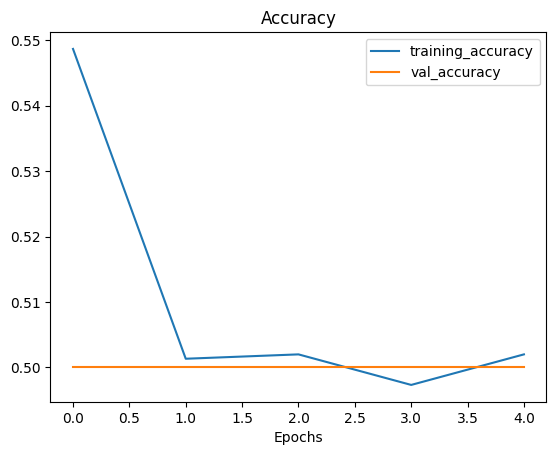

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 431ms/step - loss: 0.6631 - accuracy: 0.5860 - val_loss: 0.6199 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 20s 433ms/step - loss: 0.5903 - accuracy: 0.6860 - val_loss: 0.4470 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 20s 425ms/step - loss: 0.5029 - accuracy: 0.7547 - val_loss: 0.3661 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.4752 - accuracy: 0.7693 - val_loss: 0.3462 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 20s 422ms/step - loss: 0.4569 - accuracy: 0.7940 - val_loss: 0.3358 - val_accuracy: 0.8640


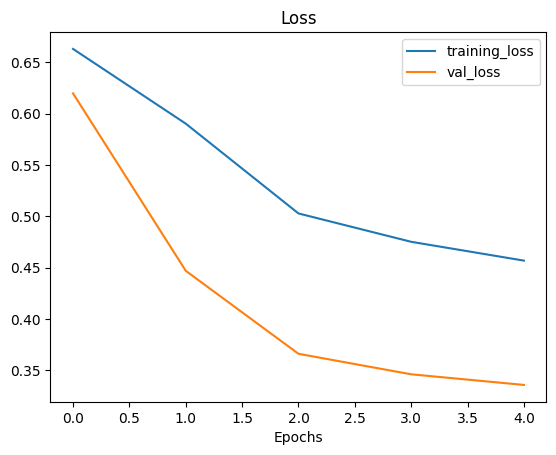

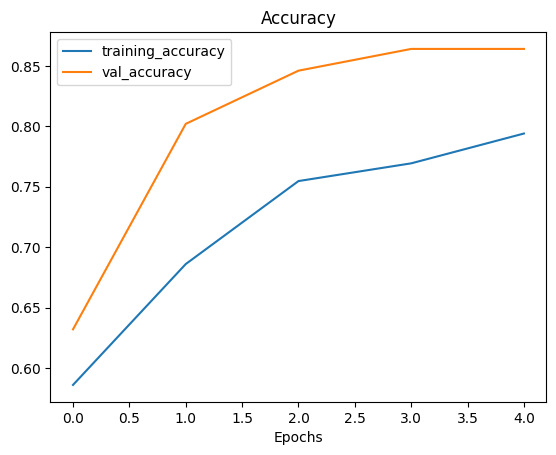

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 423ms/step - loss: 0.6689 - accuracy: 0.5987 - val_loss: 0.5396 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 21s 446ms/step - loss: 0.5542 - accuracy: 0.7447 - val_loss: 0.4702 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.5283 - accuracy: 0.7567 - val_loss: 0.4433 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 21s 441ms/step - loss: 0.5094 - accuracy: 0.7587 - val_loss: 0.3953 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 441ms/step - loss: 0.4693 - accuracy: 0.7787 - val_loss: 0.3489 - val_accuracy: 0.8440


In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
!wget https://github.com/Antonypraveenraj001/tensorflow_AI/blob/main/pizzza.jpeg


--2024-03-04 12:11:57--  https://github.com/Antonypraveenraj001/tensorflow_AI/blob/main/pizzza.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4255 (4.2K) [text/plain]
Saving to: ‘pizzza.jpeg.2’

pizzza.jpeg.2       100%[===================>]   4.16K  --.-KB/s    in 0s      

2024-03-04 12:11:57 (57.0 MB/s) - ‘pizzza.jpeg.2’ saved [4255/4255]



In [ ]:
import matplotlib.pyplot as plt

pizza = mpimg.imread("pizzza.jpeg")
plt.imshow(pizza)
plt.axis(False);

UnidentifiedImageError: cannot identify image file 'pizzza.jpeg'